# Práctica 5: Clasificación ir a Cine

In [ ]:
# Cargar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder # para la transformacion


In [2]:
df = pd.read_excel('Ir_a_cine.xlsx')
df.head()

,ID,Está lloviendo,Tengo dinero?,Me interesa la cartelera?,Asistiré
0,1,Poco,Estricto,Si,Si
1,2,No,Holgado,Si,Si
2,3,No,Holgado,Si,Si
3,4,No,Estricto,No,No
4,5,Poco,Estricto,Si,Si


In [7]:
encoder = LabelEncoder()
ObjList = df.select_dtypes(include = ('object', 'bool')).columns

for feat in ObjList:
    df[feat] = encoder.fit_transform(df[feat].astype(str))

df.head()

,ID,Está lloviendo,Tengo dinero?,Me interesa la cartelera?,Asistiré
0,1,1,0,1,1
1,2,0,1,1,1
2,3,0,1,1,1
3,4,0,0,0,0
4,5,1,0,1,1


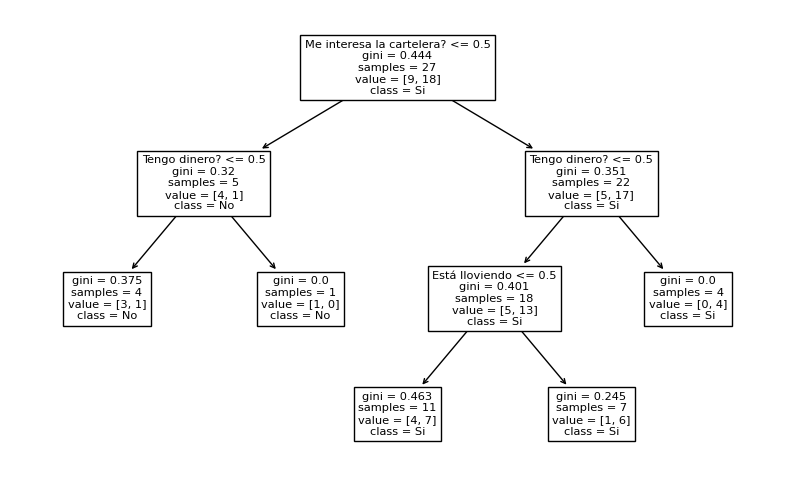

In [9]:
X = df[['Está lloviendo','Tengo dinero?','Me interesa la cartelera?']]
y = df['Asistiré']

#Crear el clasificador

AD = tree.DecisionTreeClassifier()

#Entrenar clasificador

AD = AD.fit(X,y)

#Visualizar arbol de clasificacion
plt.figure(figsize = (10,6))
tree.plot_tree(AD, feature_names = ['Está lloviendo','Tengo dinero?','Me interesa la cartelera?'],class_names = ['No','Si'])
plt.show()

#Gini es la medida de impureza por la cual está valorando la variable

In [16]:
X_new = [[1,0,1]] #LLueve poco, estricto de dinero, me interesa crtelera

prediccion = AD.predict(X_new)

if prediccion[0] == 1:
    print("No asistiré a cine")
else:
    print("Si asistiré a cine")

No asistiré a cine


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
